In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Scatter Plots ##

In [4]:
# Actors and their highest grossing movies
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


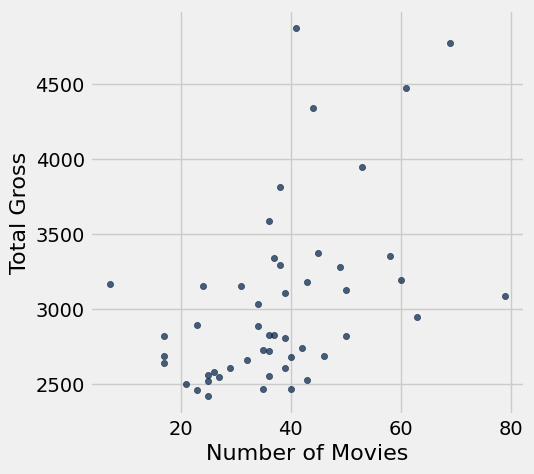

In [5]:
actors.scatter('Number of Movies', 'Total Gross')

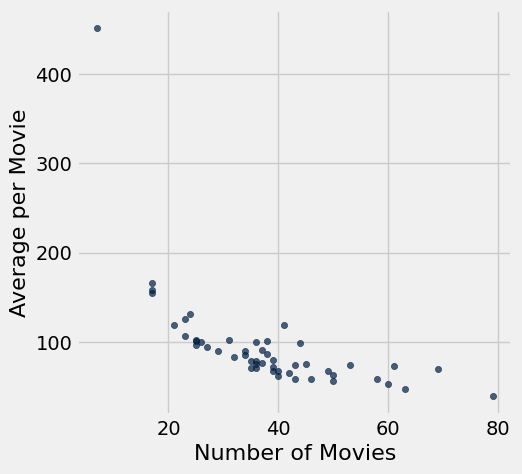

In [6]:
actors.scatter('Number of Movies', 'Average per Movie')

In [16]:
# Use Table.where() to find which actor has:
# * the lowest average per movie
# * the highest average per movie
# * the top seven actors by total gross.

actors.sort('Average per Movie', descending=True).take(0).show()
actors.sort('Average per Movie').take(0).show()
actors.sort('Total Gross', descending=True).show()

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3


Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


## Bar Charts ##

In [17]:
# Highest grossing movies in history as of 2017
# Measurements are adjusted for inflation.
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [20]:
top10_adjusted = top_movies.take(np.arange(10))
#top10_adjusted.show()

# Fill in this cell to find the top 10 by Gross
# instead of the adjusted gross.

top10_gross = top_movies.sort('Gross', descending=True)
top10_gross.show(10)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista,936662225,961143200,2015
Avatar,Fox,760507625,865082100,2009
Titanic,Paramount,658672302,1204368000,1997
Jurassic World,Universal,652270625,702747400,2015
Marvel's The Avengers,Buena Vista,623357910,683474000,2012
The Dark Knight,Warner Brothers,534858444,661980500,2008
Rogue One: A Star Wars Story,Buena Vista,532177324,537326000,2016
Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017
Finding Dory,Buena Vista,486295561,499245400,2016
Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999


In [21]:
# Convert to millions of dollars for readability
millions = np.round(top10_adjusted.column('Gross (Adjusted)') / 1000000, 3)
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

Title,Studio,Gross,Gross (Adjusted),Year,Millions
Gone with the Wind,MGM,198676459,1796176700,1939,1796.18
Star Wars,Fox,460998007,1583483200,1977,1583.48
The Sound of Music,Fox,158671368,1266072700,1965,1266.07
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,1261.09
Titanic,Paramount,658672302,1204368000,1997,1204.37
The Ten Commandments,Paramount,65500000,1164590000,1956,1164.59
Jaws,Universal,260000000,1138620700,1975,1138.62
Doctor Zhivago,MGM,111721910,1103564200,1965,1103.56
The Exorcist,Warner Brothers,232906145,983226600,1973,983.227
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,969.01


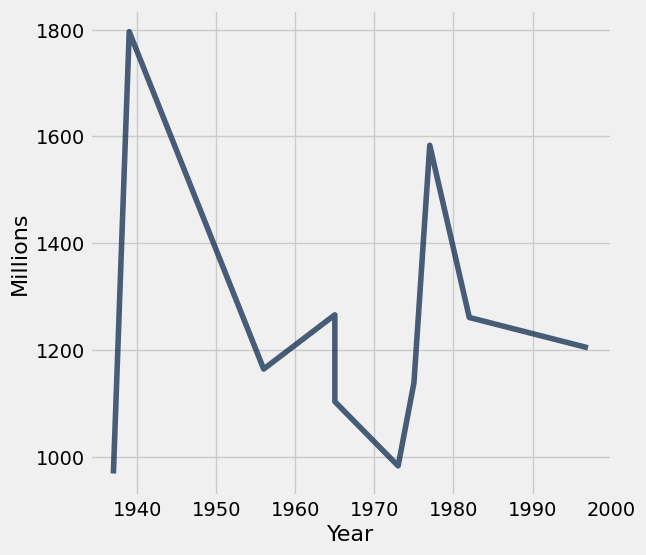

In [22]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

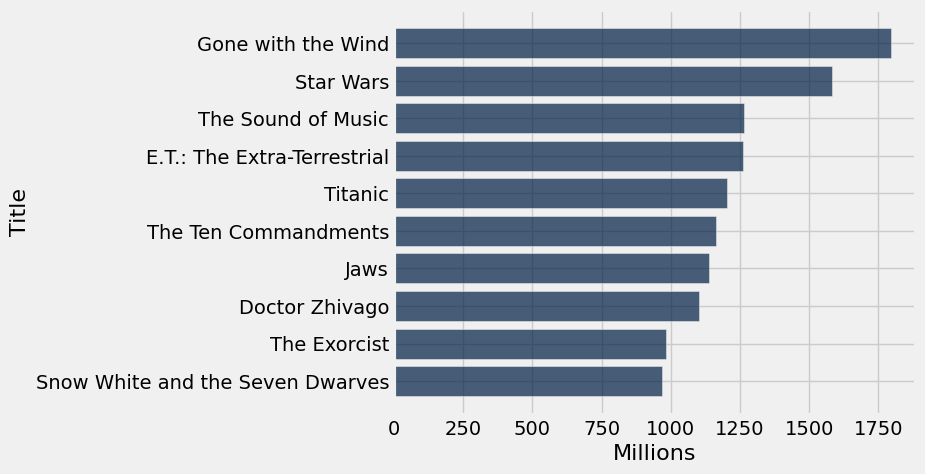

In [24]:
top10_adjusted.barh('Title', 'Millions')

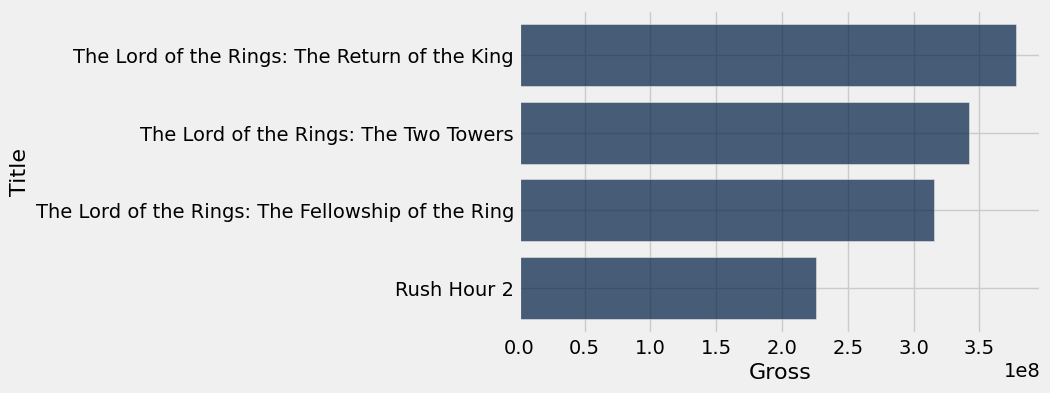

Signature:
Table.barh(
    self,
    column_for_categories=None,
    select=None,
    overlay=True,
    width=None,
    **vargs,
)
Docstring:
Plot horizontal bar charts for the table. Redirects to ``Table#ibarh`` if interactive plots
are enabled with ``Table#interactive_plots``

Args:
    ``column_for_categories`` (``str``): A column containing y-axis categories
        used to create buckets for bar chart.

Kwargs:
    overlay (bool): create a chart with one color per data column;
        if False, each will be displayed separately.
    show (bool): whether to show the figure if using interactive plots; if false, the 
        figure is returned instead
    vargs: Additional arguments that get passed into `plt.barh`.
        See http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh
        for additional arguments that can be passed into vargs.

Raises:
    ValueError -- Every selected except column for ``column_for_categories``
        must be numerical.

Returns:
    Horiz

In [27]:
# Exercise: make a bar chart of all movies released by Newline after 2000
# and include the gross revenue.

top_movies.where('Studio', 'Newline').where('Year', are.above(2000)).barh('Title', 'Gross')
Table.barh?